# Module 2: Targeted Marketing

*Note: All charts are not rendered due to file size constraints*

In [ ]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
alt.data_transformers.disable_max_rows()


data = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv")


# data.rename(columns={'emp.var.rate': 'emp_var_rate'})
data.columns = data.columns.str.replace('.', '_')

data.head(5)



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
data2 = data
data2.dropna()
data2['y'] = pd.factorize(data2['y'])[0]
data2 = pd.get_dummies(data2, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'], drop_first=True)

data2 = data2.corr()
data2['y'].sort_values(ascending=False)


y                                1.000000
poutcome_success                 0.316269
previous                         0.230181
month_mar                        0.144014
month_oct                        0.137366
month_sep                        0.126067
job_student                      0.093955
job_retired                      0.092221
month_dec                        0.079303
cons_conf_idx                    0.054878
marital_single                   0.054133
education_university.degree      0.050364
age                              0.030399
education_unknown                0.021430
job_unemployed                   0.014752
day_of_week_thu                  0.013888
housing_yes                      0.011743
day_of_week_tue                  0.008046
education_illiterate             0.007246
day_of_week_wed                  0.006302
marital_unknown                  0.005211
education_professional.course    0.001003
job_unknown                     -0.000151
job_management                  -0

# Misc Graphs

In [ ]:
alt.data_transformers.disable_max_rows()
alt.Chart(data).mark_bar().encode(
    x = 'poutcome',
    y = alt.Y('count(y)', stack="normalize", axis=alt.Axis(title="Percent", format="%")),
    color='y'
    # tooltip=['count(y)']
).properties(
    width=100,
    height=200
)

In [ ]:
alt.Chart(data).mark_bar().encode(
    x = 'job',
    y = alt.Y('count(y)', stack="normalize", axis=alt.Axis(title="Percent", format="%")),
    color='y'
    # tooltip=['count(y)']
).properties(
    width=200,
    height=250
)

The above charts seem to show:


*   Students are a positive correlation
*   Retired is a positive correlation, unless single
*   Serivces has a negative correlation (always the lowest)



--------------------------------





In [ ]:
alt.Chart(data).mark_bar().encode(
    x = alt.X('day_of_week', sort=['mon', 'tue', 'wed', 'thu', 'fri']),
    y = alt.Y('count(y)', stack="normalize", axis=alt.Axis(title="Percent", format="%")),
    color='y',
    column= alt.Column(
        'month',
        sort=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    )
    # tooltip=['count(y)']
)

The above charts seems to show that the following months have better results:


*   March
*   April (kinda)
*   September
*   October
*   December

---------------------------



In [ ]:
alt.Chart(data).mark_bar().encode(
    x = alt.X('campaign', bin=alt.Bin(extent=[0, 44], step=2)),
    y = alt.Y('count(y)', stack="normalize", axis=alt.Axis(title="Percent", format="%")),
    color='y',
    tooltip=['count(y)']
).properties(
    width=200,
    height=250
)

In [ ]:
alt.Chart(data).mark_bar().encode(
    x = alt.X('age', bin=alt.Bin(extent=[15, 98], step=5)),
    y = alt.Y('count(y)', stack="normalize", axis=alt.Axis(title="Percent", format="%")),
    color='y',
    column='contact'
    # tooltip=['count(y)']
).properties(
    width=300,
    height=200
)

In [ ]:
alt.Chart(data).mark_bar().encode(
    x = alt.X('euribor3m', bin=alt.Bin(extent=[3, 5.2], step=0.1)),
    y = alt.Y('count(y)', stack="normalize", axis=alt.Axis(title="Percent", format="%")),
    color='y'
    # tooltip=['count(y)']
).properties(
    width=300,
    height=200
)

# Test 1
Age, job, month, poutcome

**Result = Weighted Average 77%**

---

# Test 2

Age, job, month, poutcome, education, loan

**Results = Weighted Average 78%**

---

# Test 3

Age, job, poutcome, month, education, loan, euribor3m

**Results = Weighted Average 82-84%**

*Notes: pdays seems to have effect or slightly detrimental*

---

# Test 4

Age, job, month, poutcome, education, loan, euribor3m, marital, emp_var_rate, cons_price_idx, cons_conf_idx, contact, pdays, nr_employed

**Results = Weighted Average 83%**

*Notes:*


*   nr.employed seemed to decrease F1 by 1%.
*   Previous seemed to decrease F1 by several %.
*   The following don't seem to increase the score, but seem to stabilize the predictions: marital, emp_var_rate, cons_price_idx, cons_conf_idx, contact, pdays






In [ ]:
# separating out the data we want to test and then onehot encoding it.

randomNum = 56

testdata2 = data[['y', 'age', 'job', 'poutcome', 'month', 'education', 'loan', 'euribor3m', 'marital', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'contact', 'pdays', 'nr_employed']]
testdata2.dropna(subset=['age', 'job', 'poutcome', 'month', 'education', 'loan', 'euribor3m', 'marital', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'contact', 'pdays', 'nr_employed'])

testdata2['y'] = pd.factorize(testdata2['y'])[0]

encodedData = pd.get_dummies(testdata2, columns=['job', 'month', 'poutcome', 'education', 'loan', 'marital', 'contact'], drop_first=True)

columnNames = list(encodedData.columns.values)

# Oversampling

ro = SMOTE(random_state=randomNum, sampling_strategy=0.25)

X = encodedData.drop(['y'], axis=1)
y = encodedData['y']

# Oversample, note that we oversample X and y at the same time in order to 
# make sure our features and targets stay synched.
X_over, y_over = ro.fit_resample(X, y)

# Convert this to a dataframe and check the counts, now they're equal, because
# we have a bunch of duplicate survivors
oversampledY = pd.DataFrame(y_over)
oversampledY.value_counts()



# undersampling

oversampledX = pd.DataFrame(X_over)
oversampledy = pd.DataFrame(y_over)

ru = RandomUnderSampler(random_state=randomNum, sampling_strategy=0.40)

X = oversampledX
y = oversampledy

X_overunder, y_overunder = ru.fit_resample(X, y)

overunderY = pd.DataFrame(y_overunder)
overunderY.value_counts()



clf = DecisionTreeClassifier(random_state=randomNum, max_depth=30, min_samples_leaf=4)

overundersampledX = pd.DataFrame(X_overunder)
overundersampledy = pd.DataFrame(y_overunder)

X_train, X_test, y_train, y_test = train_test_split(overundersampledX, y_overunder, test_size=0.2, random_state=randomNum)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = pd.DataFrame(clf.predict(X_test))


print("F1:",metrics.classification_report(y_test, y_pred))

# ftImportance = pd.DataFrame(clf.feature_importances_)
# ftImportance.rename(columns=columnNames)
# ftImportance.insert(0, 'feature', columnNames[1:])
# ftImportance.columns = ['feature', 'importance']
# ftImportance.sort_values(by=['importance'], ascending=False, inplace=True)
# ftImportance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


F1:               precision    recall  f1-score   support

           0       0.85      0.93      0.89      4553
           1       0.77      0.61      0.68      1843

    accuracy                           0.84      6396
   macro avg       0.81      0.77      0.79      6396
weighted avg       0.83      0.84      0.83      6396



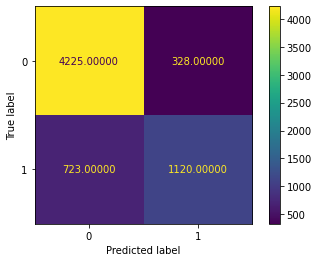

In [ ]:
metrics.plot_confusion_matrix(clf, X_test, y_test, values_format = '.5f')
plt.show() 

In [ ]:
# Save the Model as a pickle
import pickle
with open('final_model.pickle', 'wb') as handle:
    pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL)


# Final Test

In [ ]:
from google.colab import files

# the final test csv must be uploaded to the colab session on the left-hand side for the below to work

finalTest = pd.read_csv('/content/bank_additional_final_test_fixed.csv')


finalTest.columns = finalTest.columns.str.replace('.', '_')
finalTest = finalTest[['age', 'job', 'poutcome', 'month', 'education', 'loan', 'euribor3m', 'marital', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'contact', 'pdays', 'nr_employed']]

finalTest = pd.get_dummies(finalTest, columns=['job', 'month', 'poutcome', 'education', 'loan', 'marital', 'contact'], drop_first=True)

#Predict the response for test dataset
finalPrediction = pd.DataFrame(clf.predict(finalTest))

finalPrediction.to_csv('nathanWheewright_module2_finalPrediction.csv')

files.download("nathanWheewright_module2_finalPrediction.csv")